## 🗞️E-Commerce Product Classification: TF-IDF

## 📂Step 1: Install & Import Libraries

In [1]:
import pandas as pd

## 🗂️Step 2: Load data set

In [2]:
df = pd.read_csv("processed_ecommerceDataset.csv") 
df.head()

,label,text,processed_text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood 30 inch x 10 i...
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf uv texture modern art print framed paintin...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic 13....
3,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gifts india wooden happy birthday u...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,pitaara box romantic venice canvas painting 6 ...


## 🔍Step 3: Explore Data

In [3]:
df.isnull().sum()

label             0
text              0
processed_text    1
dtype: int64

In [4]:
df.dropna(inplace=True)
df.shape

(27800, 3)

## 🪓Step 5: train test split

In [6]:
from sklearn.model_selection import train_test_split

X = df["processed_text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 📘 Step 6: TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## 🤖Step 6: Train the Model

---
### 🧪ultinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

y_pred_nb = model_nb.predict(X_test_tfidf)

print("🔹 Multinomial Naive Bayes")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

🔹 Multinomial Naive Bayes
✅ Accuracy: 0.9251798561151079
                      precision    recall  f1-score   support

               Books       0.97      0.90      0.93      1270
Clothing_Accessories       0.97      0.93      0.95      1124
         Electronics       0.95      0.84      0.90      1049
           Household       0.87      0.98      0.92      2117

            accuracy                           0.93      5560
           macro avg       0.94      0.91      0.93      5560
        weighted avg       0.93      0.93      0.93      5560



---
### 🧪Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

y_pred_lr = model_lr.predict(X_test_tfidf)

print("🔹 Logistic Regression")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression
✅ Accuracy: 0.9548561151079137
                      precision    recall  f1-score   support

               Books       0.96      0.94      0.95      1270
Clothing_Accessories       0.97      0.96      0.97      1124
         Electronics       0.96      0.92      0.94      1049
           Household       0.94      0.97      0.96      2117

            accuracy                           0.95      5560
           macro avg       0.96      0.95      0.95      5560
        weighted avg       0.96      0.95      0.95      5560



---
### 🧪Support Vector Machine (SVM)

In [18]:
from sklearn.svm import LinearSVC

model_svm = LinearSVC()
model_svm.fit(X_train_tfidf, y_train)

y_pred_svm = model_svm.predict(X_test_tfidf)

print("🔹 Linear SVM")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

d:\my web\python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


🔹 Linear SVM
✅ Accuracy: 0.9618705035971223
                      precision    recall  f1-score   support

               Books       0.97      0.95      0.96      1270
Clothing_Accessories       0.98      0.98      0.98      1124
         Electronics       0.95      0.93      0.94      1049
           Household       0.95      0.97      0.96      2117

            accuracy                           0.96      5560
           macro avg       0.96      0.96      0.96      5560
        weighted avg       0.96      0.96      0.96      5560



## 🏆 Best model

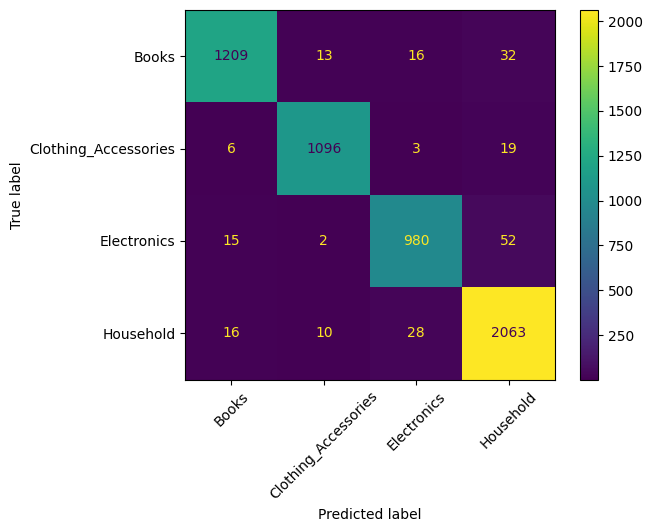

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svm, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot(xticks_rotation=45)


## 📩 Save model

In [21]:
import joblib

# Save the best model
joblib.dump(model_svm, 'best_model_svm.pkl')
print("Best model saved as 'best_model_svm.pkl'")

Best model saved as 'best_model_svm.pkl'


## ⚗️Test on Your Own Input

In [ ]:
sample = ["Elegant leather boots for winter"]  
sample_tfidf = tfidf.transform(sample)
predicted_label = model_svm.predict(sample_tfidf)
print("🔍 Predicted Category:", predicted_label[0])


🔍 Predicted Category: Clothing_Accessories
